In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

In [2]:
# lets read the data and see its shape
bank_data = pd.read_csv('datasets/bank-full.csv', delimiter = ';')
print('Shape of the data is: ', bank_data.shape)
bank_data.head()

Shape of the data is:  (45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
# lets see the summary of columns
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
# lets seperately investigate the numerical and categorical columns. lets start with extracting numerics
numeric_data = bank_data.select_dtypes(include=np.number) 
numeric_col = numeric_data.columns                                                            

numeric_data.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [6]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   balance   45211 non-null  int64
 2   day       45211 non-null  int64
 3   duration  45211 non-null  int64
 4   campaign  45211 non-null  int64
 5   pdays     45211 non-null  int64
 6   previous  45211 non-null  int64
dtypes: int64(7)
memory usage: 2.4 MB


In [7]:
# lets extract the categorical data now
categorical_data = bank_data.select_dtypes(exclude=np.number) # select data with categorical features
categorical_col = categorical_data.columns                                                            

categorical_data.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [8]:
categorical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job        45211 non-null  object
 1   marital    45211 non-null  object
 2   education  45211 non-null  object
 3   default    45211 non-null  object
 4   housing    45211 non-null  object
 5   loan       45211 non-null  object
 6   contact    45211 non-null  object
 7   month      45211 non-null  object
 8   poutcome   45211 non-null  object
 9   y          45211 non-null  object
dtypes: object(10)
memory usage: 3.4+ MB


In [9]:
# whole dataset is splitted into categorical_data and numerical_data. now lets check the missing values by starting from nums.
missing_values_numeric = numeric_data.isnull()

total_missing = missing_values_numeric.sum().sum()
print("Total missing values in numerical features:", total_missing)

Total missing values in numerical features: 0


In [10]:
# now for the categorical features
missing_values_categorical = categorical_data.isnull()

total_missing = missing_values_categorical.sum().sum()
print("Total missing values in categorical features:", total_missing)

Total missing values in categorical features: 0


no     39922
yes     5289
Name: y, dtype: int64


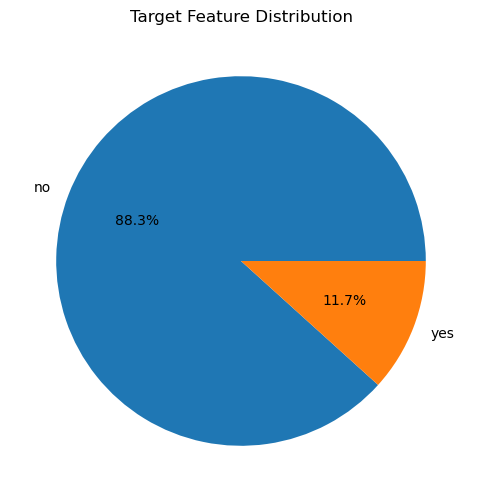

In [11]:
# No missing values, thats good news. We can check for the class distribution.
target = bank_data['y'].value_counts()
print(target)
plt.figure(figsize=(6, 6))
plt.pie(target, labels=target.index, autopct='%1.1f%%')
plt.title('Target Feature Distribution')
plt.show()

In [12]:
# thats bad news. class has an unbalanced output which might cause one class to be poorly learnt by machine.
# this step will be dealt with during preprocessing. Lets go to the next stage and detect the outliers in dataset.

In [13]:
# there are several ways for handling these outliers such as normalization, standardization, transformation (e.g taking the
# square root or logarithm of each numeric column), capping and flooring ( e.g setting max-min limits for the numeric values)
# .....etc depending on the charachteristics of data. 

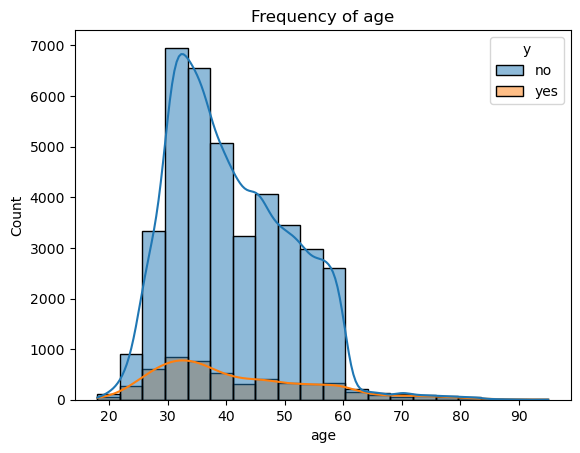

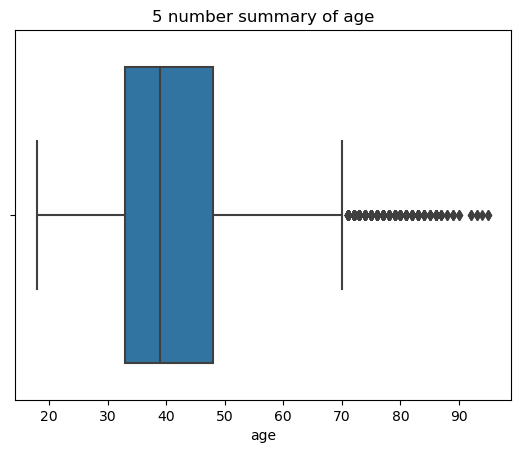

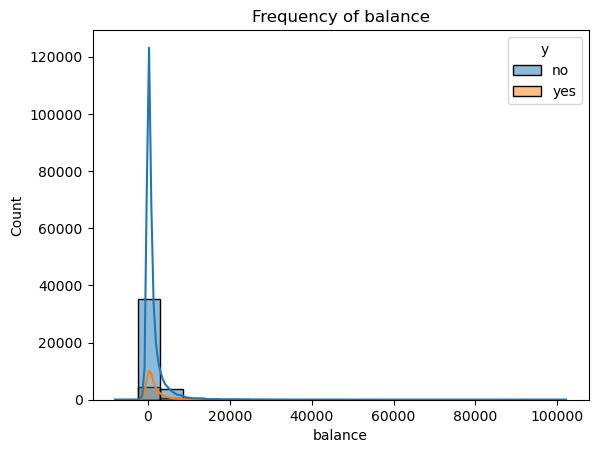

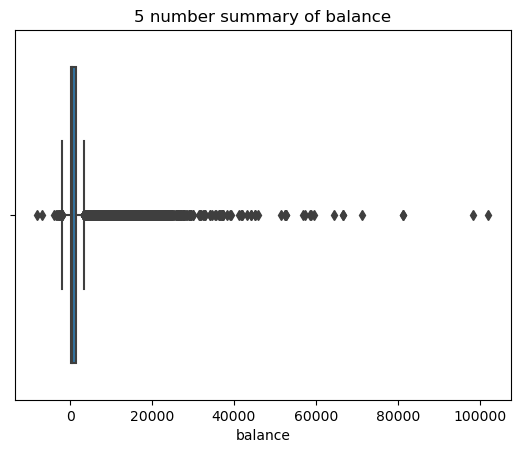

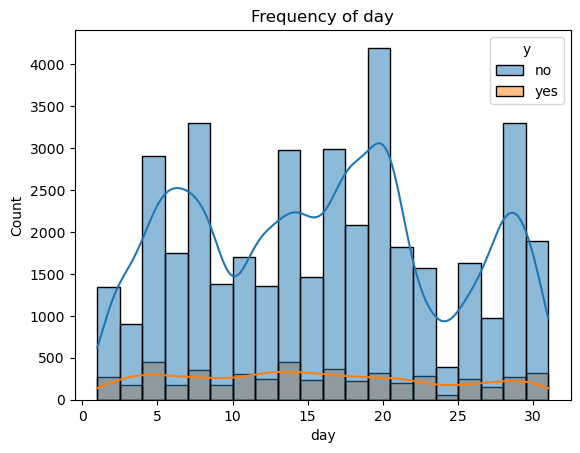

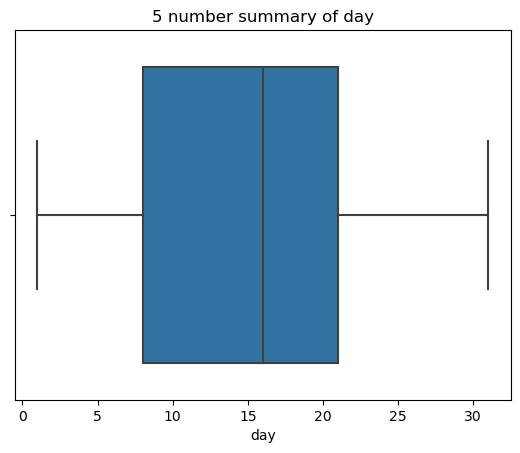

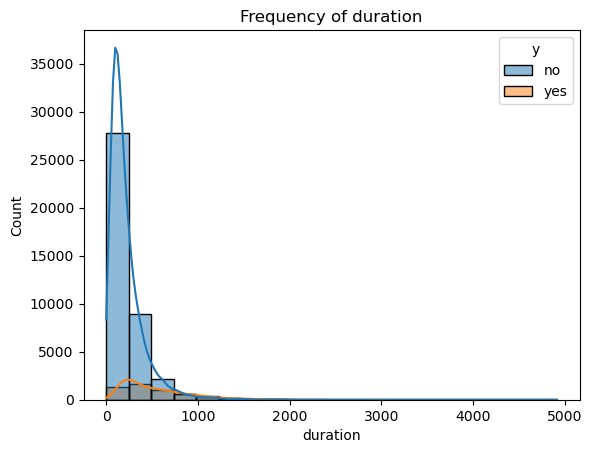

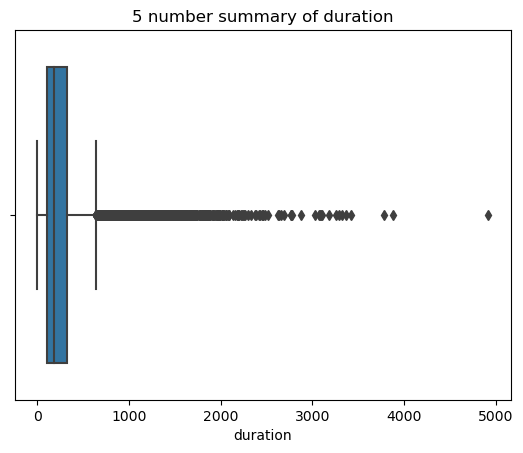

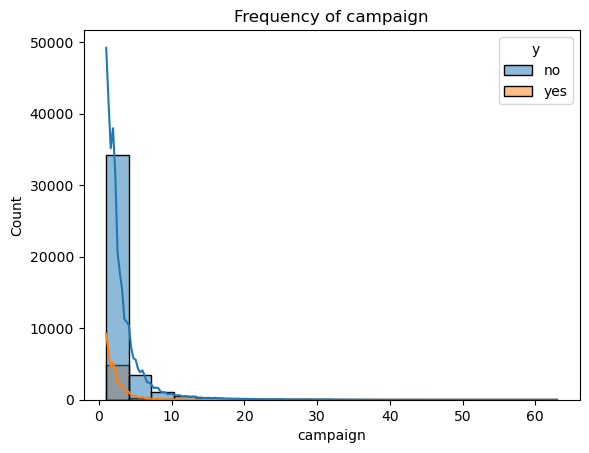

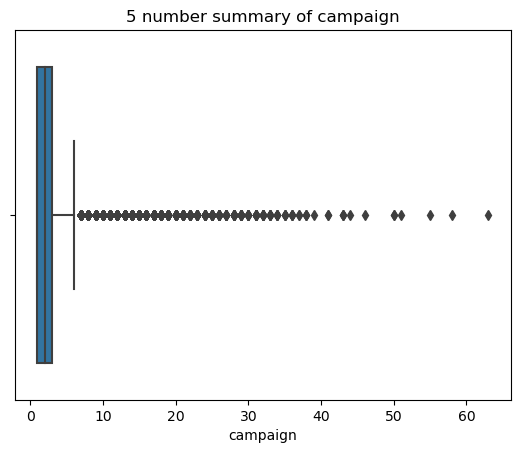

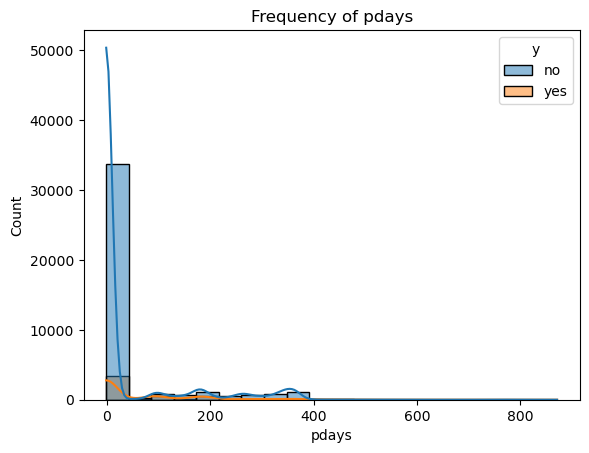

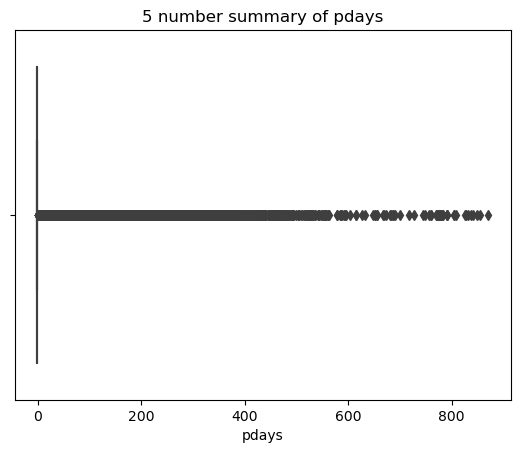

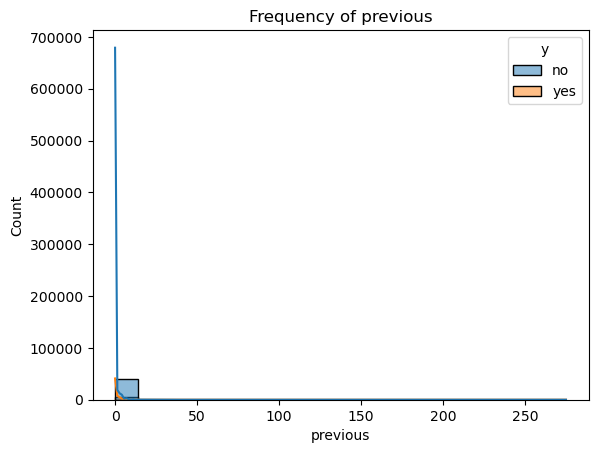

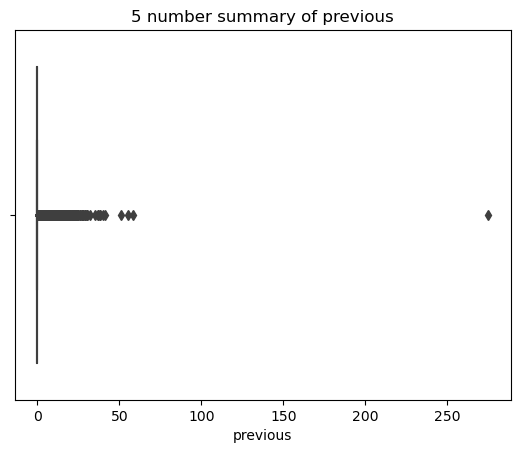

In [14]:
# to handle outliers for our case lets see the distribution of each column and what is the output result when the numeric 
# column has a specific value
for column in numeric_data.columns:
        sns.histplot(data=bank_data, x=column, hue='y', bins=20, kde=True)
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.title('Frequency of '+ column)
        plt.show()
        
        sns.boxplot(data=bank_data, x = column)
        plt.xlabel(column)
        plt.title('5 number summary of ' + column)
        plt.show()

In [15]:
# from the graphs we can see that many of customers who subscribed the term deposit product tend to be in the first 3 quartile.
# Hence, by calculating the IQR-Statistics, we can get rid of outliers. Before that, lets see the heat-map between the numeric
# features and the output variable to later on compare with the data whose outliers will be removed.

In [16]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


C:\Users\BatuhanYILMAZ\AppData\Local\Temp\ipykernel_9784\1084092469.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = bank_data.corr()


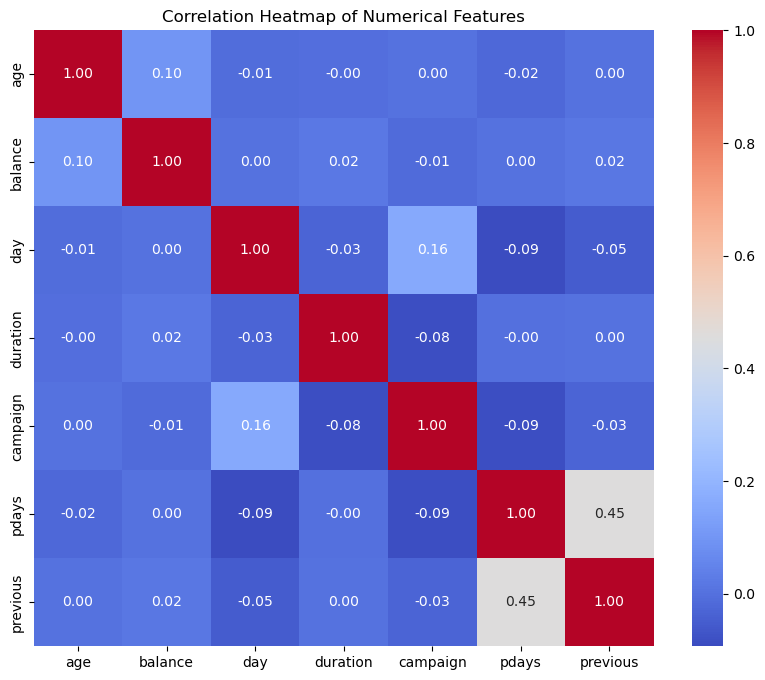

In [17]:
# now, lets see the correlation 
correlation_matrix = bank_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [18]:
# from heatmap and from the histogram of pdays, we can now understand that how many days have passed after  the customer 
# was contacted does have almost 0 impact on the output. So, we can remove the "pdays" column. 

# As the heat-map suggests, in order not to break the characteristics of data, so-called "sibling" of pdays, which is 
# "previous" column should be removed as well. Because how many times the customer was contacted before this campaing simply
# has no impact on the output. Its variance is pretty less and mostly consists of single values.

# since the duration is the key factor, 2 models will be created. ( 1 including the duration feature, and the other one not )
# for the other numerical columns, IQR statistics can be used to handle outliers. 

In [19]:
numeric_data.drop(['pdays','previous'],1,inplace=True)

C:\Users\BatuhanYILMAZ\AppData\Local\Temp\ipykernel_9784\4121543909.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  numeric_data.drop(['pdays','previous'],1,inplace=True)


In [20]:
numeric_data.head()

,age,balance,day,duration,campaign
0,58,2143,5,261,1
1,44,29,5,151,1
2,33,2,5,76,1
3,47,1506,5,92,1
4,33,1,5,198,1


age          487
balance     4729
day            0
duration    3235
campaign    3064
dtype: int64


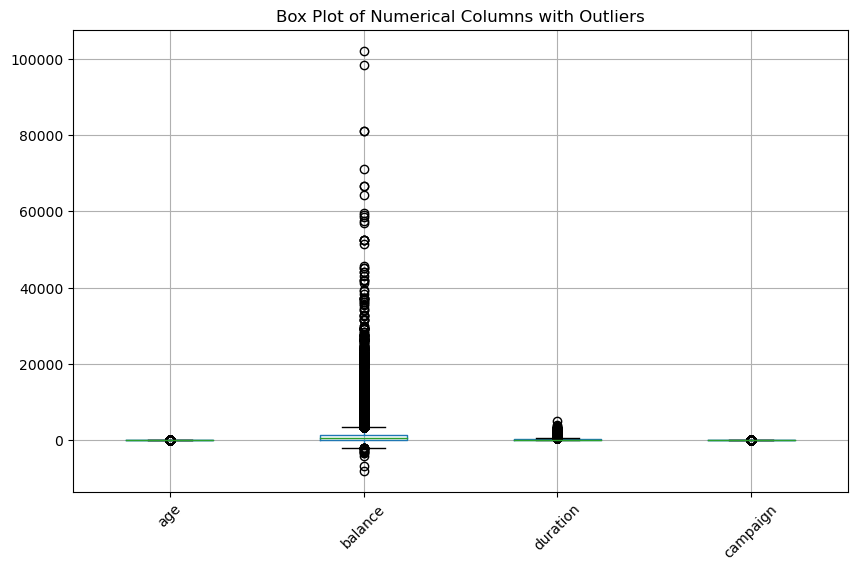

In [21]:
# we can now calculate IQR (Interquartile Range) and check for values that are below and above the first - third quartile.

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)

#Calculate IQR
IQR = Q3 - Q1

# Define the outlier thresholds
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# Detect outliers
outliers = (numeric_data < lower_threshold) | (numeric_data > upper_threshold)

# Count the number of outliers in each column
outlier_counts = outliers.sum()

print(outlier_counts)

# Then, lets visualize it to have a better insight.
columns_with_outliers = outliers.any()

# Create a box plot for columns with outliers
plt.figure(figsize=(10, 6))
numeric_data[columns_with_outliers.index[columns_with_outliers]].boxplot()
plt.title('Box Plot of Numerical Columns with Outliers')
plt.xticks(rotation=45)
plt.show()

In [22]:
# lets take the copy of original numeric_data just in case
numeric_data_without_outliers_IQR= numeric_data.copy()

# Now, lets reemove the rows with outliers for each column
for column in numeric_data.columns:
    numeric_data_without_outliers_IQR = numeric_data_without_outliers_IQR[~outliers[column]]
# lets see the new shape
numeric_data_without_outliers_IQR.shape

C:\Users\BatuhanYILMAZ\AppData\Local\Temp\ipykernel_9784\3285221851.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  numeric_data_without_outliers_IQR = numeric_data_without_outliers_IQR[~outliers[column]]


(34719, 5)

In [23]:
# about 8,000 of outliers were removed from the dataset as the result of IQR method.
# lets save the "numeric_data_without_outliers_IQR" dataset and put it aside for now, then try a few more different methods for 
# handling the outliers in numerical features. Then, models can be created to evaluate the performance of each specific
# method-based dataset once it is combined with the "categorical_features" dataset.

In [24]:
## lets start with winsorization method. lets copy the data for it.
# basically, winsorization will select a specific percentage and the values above and below that percentile (e.g: values below
# 5 percent and values above 95 percent) will be replaced with the nearest non-outlier values within the specified range.
# unlike IQR, it does not remove the outliers, but modifies them to be in the general distribution limits of related
# feature in dataset.
from scipy.stats import mstats

numeric_data_without_outliers_Winsorization = numeric_data.copy()
numeric_data_without_outliers_Winsorization.sample(10)
# lets get the column names 
numeric_data_without_outliers_Winsorization_columns = numeric_data_without_outliers_Winsorization.select_dtypes(include=np.number).columns

lower_limit = 5
upper_limit = 95

# Apply Winsorizing to all numerical columns
for column in numeric_data_without_outliers_Winsorization_columns:
    numeric_data_without_outliers_Winsorization[column] = mstats.winsorize(numeric_data_without_outliers_Winsorization[column], limits = (lower_limit/100, upper_limit/100),inclusive=(True, True))

numeric_data_without_outliers_Winsorization.sample(10)

,age,balance,day,duration,campaign
33227,27,-172,3,35,1
12750,27,-172,3,35,1
8043,27,-172,3,35,1
34751,27,-172,3,35,1
37816,27,-172,3,35,1
25255,27,-172,3,35,1
153,27,-172,3,35,1
5029,27,-172,3,35,1
29411,27,-172,3,35,1
12924,27,-172,3,35,1


In [25]:
numeric_data_without_outliers_Winsorization.shape

(45211, 5)

In [26]:
# now lets try another method -> min-max scaling
# This technique will scale the numerical features to a specific range, commonly [0, 1], making them lie within this range.
from sklearn.preprocessing import MinMaxScaler
numeric_data_without_outliers_Min_Max = numeric_data.copy()

column_list = numeric_data_without_outliers_Min_Max.columns.tolist()

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Apply Min-Max scaling to all numerical columns
numeric_data_without_outliers_Min_Max[column_list] = scaler.fit_transform(numeric_data_without_outliers_Min_Max[column_list])
numeric_data_without_outliers_Min_Max.sample(10)

,age,balance,day,duration,campaign
25385,0.272727,0.185717,0.566667,0.008133,0.000000
37996,0.272727,0.071505,0.433333,0.018910,0.016129
13900,0.493506,0.073611,0.300000,0.016877,0.000000
14887,0.389610,0.073884,0.500000,0.035990,0.000000
18122,0.441558,0.074138,0.966667,0.018300,0.048387
44591,0.103896,0.081546,0.666667,0.002237,0.000000
41775,0.441558,0.103154,0.400000,0.046157,0.000000
26155,0.168831,0.083916,0.633333,0.015250,0.016129
13549,0.311688,0.079195,0.266667,0.006303,0.000000
24086,0.337662,0.084824,0.800000,0.024197,0.000000


In [27]:
# lets proceed with the StandardScaler method
# this method is particularly useful when features have different scales, and we aim to bring them to a common scale without
# necessarily restricting them to a specific range like [0, 1]. (unlike the MinMax Scaler)

# ensures that feature distributions have mean = 0 and std = 1. 
# when there're few outliers, but not so extreme that needs clipping
from sklearn.preprocessing import StandardScaler
numeric_data_without_outliers_Std_Scal = numeric_data.copy()

column_list = numeric_data_without_outliers_Std_Scal.columns.tolist()

# Create a StandardScaler instance
scaler = StandardScaler()

# Apply Standard Scaling to all numerical columns
numeric_data_without_outliers_Std_Scal[column_list] = scaler.fit_transform(numeric_data_without_outliers_Std_Scal[column_list])
numeric_data_without_outliers_Std_Scal.sample(10)

,age,balance,day,duration,campaign
25038,1.324443,5.065709,0.263576,-0.652997,-0.569351
13381,0.571051,-0.447419,-0.817845,-0.031698,-0.569351
31201,0.100181,0.004509,-1.658950,1.762303,0.399020
39537,0.100181,-0.097306,1.224839,-0.517088,-0.569351
7738,0.947747,-0.346589,1.705471,-0.202555,-0.246560
39604,-1.877472,-0.329182,1.224839,-0.493789,-0.246560
26977,-0.747384,0.671234,0.624050,0.244003,-0.569351
30323,0.100181,-0.584377,-1.298476,-0.687945,0.076230
23839,0.759399,-0.447419,1.585313,-0.606400,-0.246560
23354,-0.182341,-0.179415,1.344997,-0.858802,0.076230


In [28]:
## we have used 4 different outlier methods: IQR, 
#                                            Winsorization,
#                                            MinMax Scaling,
#                                            Standard Scaling (Z-score)

# since there were no missing continous columns, no imputing/removing methods for them implemented.

In [29]:
# now lets proceed to check for missing/unknown values in categorical_data dataset as well.
categorical_data.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


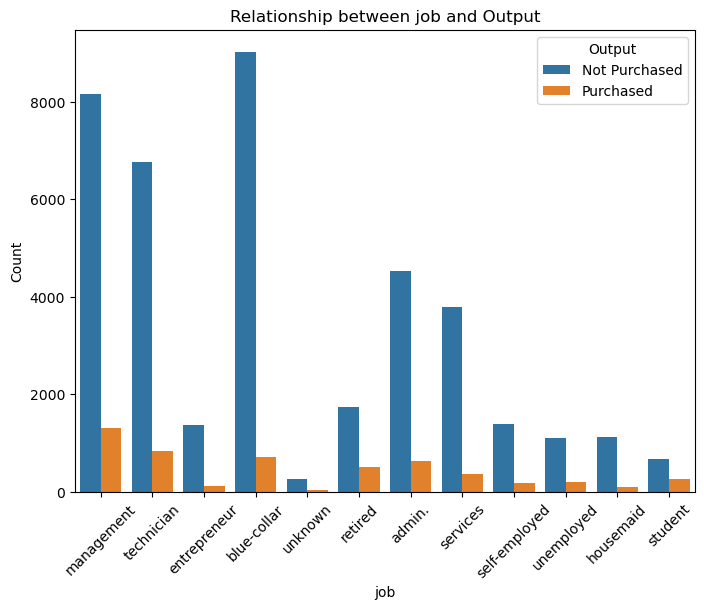

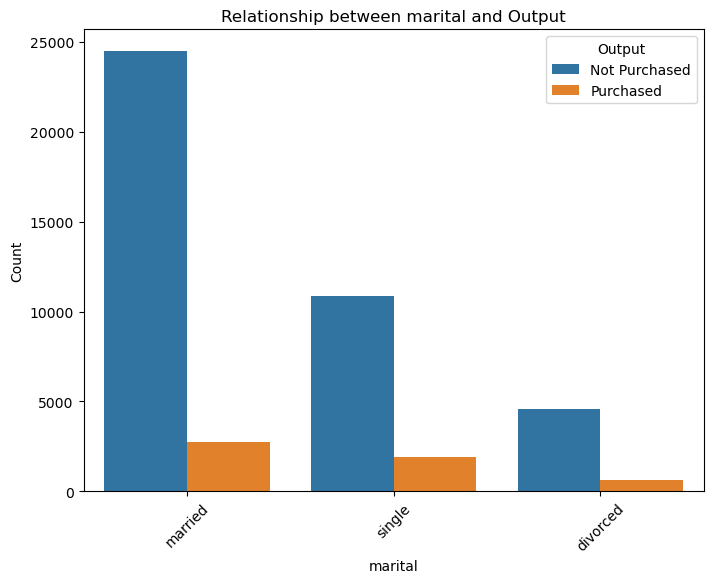

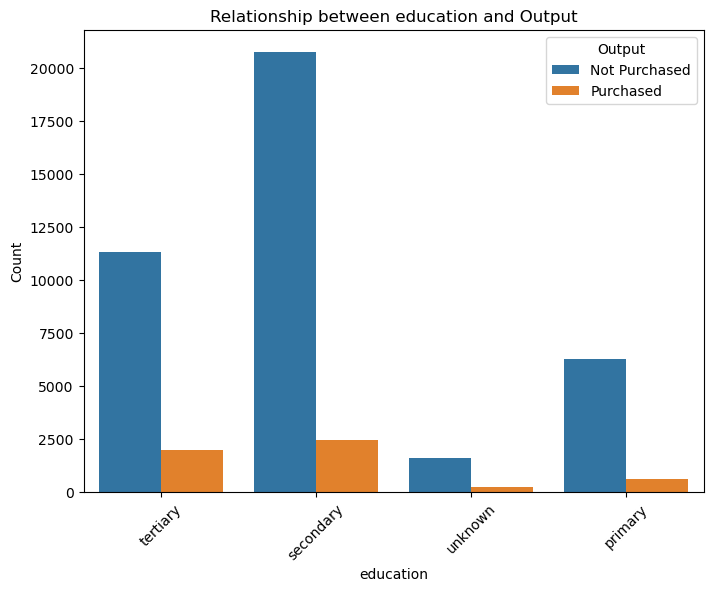

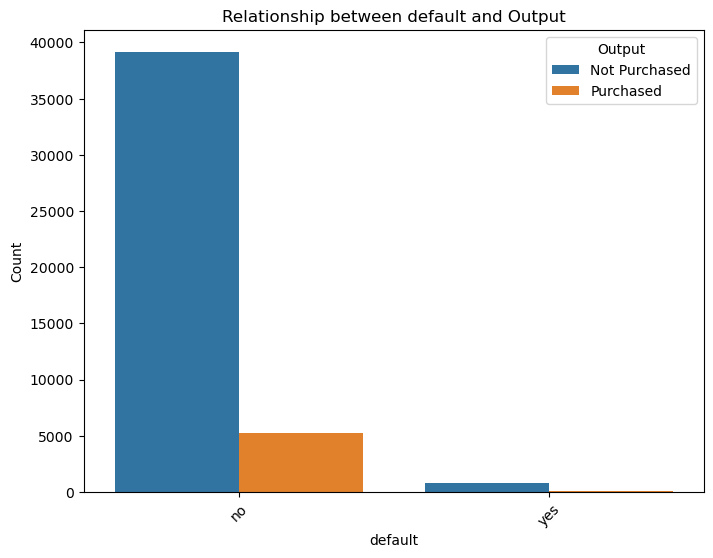

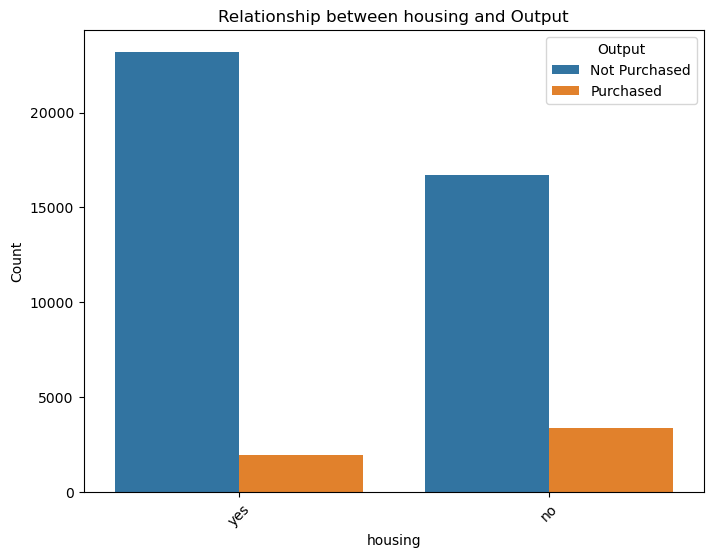

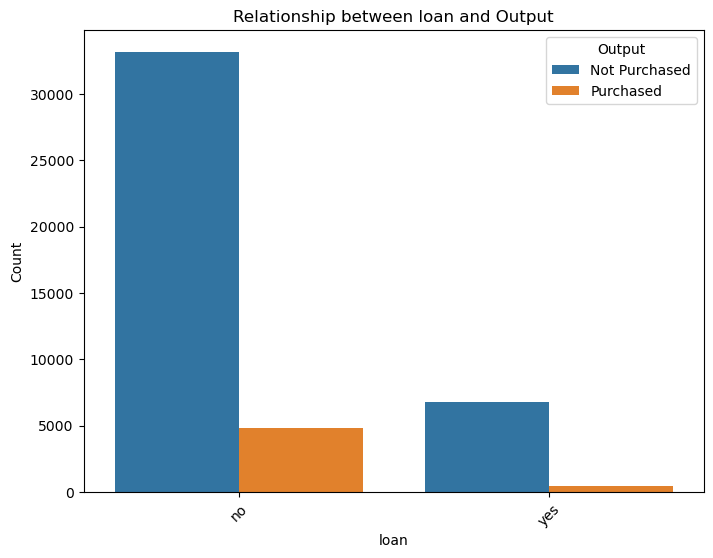

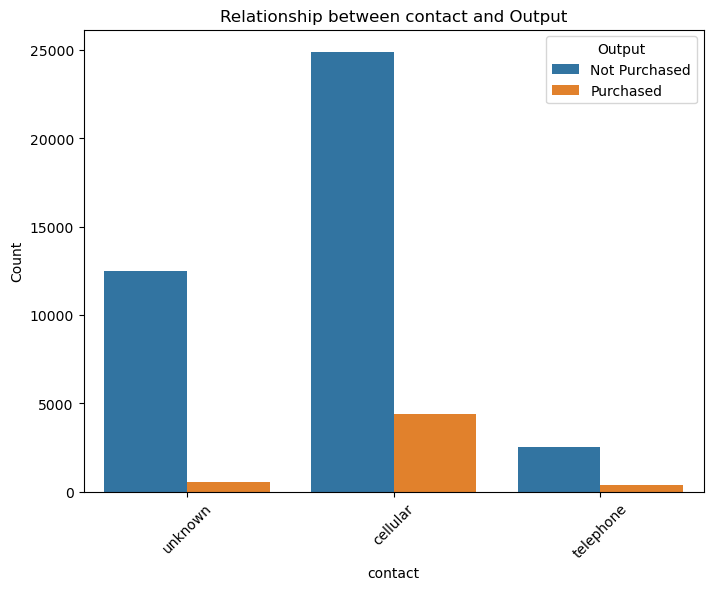

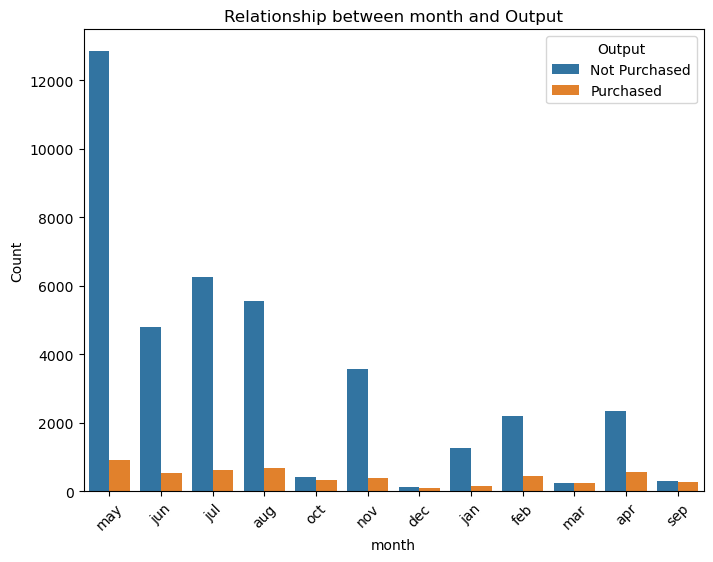

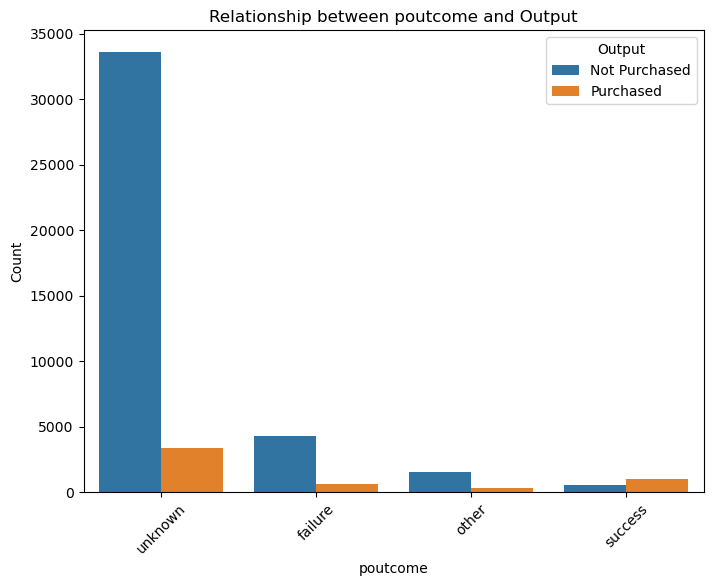

In [30]:
# we know that there are no missing values in the dataset. However, some of the categorical features have 'unknown' values.
# deciding on to remove or change these values will be easier after getting some insight about data with visualizations.
target_variable = categorical_data['y']
categorical_data = categorical_data.drop(columns=['y'])

# Create individual stacked bar plots for each categorical column
for column in categorical_data.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=categorical_data, x=column, hue=target_variable)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Relationship between {column} and Output')
    plt.xticks(rotation=45)
    plt.legend(title='Output', labels=['Not Purchased', 'Purchased'])
    plt.show()

In [31]:
categorical_data.head()

,job,marital,education,default,housing,loan,contact,month,poutcome
0,management,married,tertiary,no,yes,no,unknown,may,unknown
1,technician,single,secondary,no,yes,no,unknown,may,unknown
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown
4,unknown,single,unknown,no,no,no,unknown,may,unknown


In [32]:
# Since specific categorical cases might lead to specific situations ( like the contact way, poutcome can incresae/decrease the 
# possibility of a customer to buy the product), it is better not to remove these rows from the dataset. E.g: people with
# unknown education level or unknown previous outcome may be more likely to buy the product.

# If we come to observations, following inferences can be made:
'''
    People with following features are more likely to buy the product:
    -     mostly work as manager, technician and blue-collar.
    -     married.
    -     education levels are "secondary" or "tertiary".
    -     have no default credit
    -     got contacted with cell-phone
'''

'\n    People with following features are more likely to buy the product:\n    -     mostly work as manager, technician and blue-collar.\n    -     married.\n    -     education levels are "secondary" or "tertiary".\n    -     have no default credit\n    -     got contacted with cell-phone\n'

In [33]:
# let us do the hypothesis testing as well using the visualizations we performed.

# Null Hypothesis (H0): There is no significant difference in the likelihood of subscribing to the term deposit between 
# customers aged 35 or younger and customers older than 35.

# Alternative Hypothesis (H1): Customers aged 35 or younger are more likely to subscribe to the term deposit compared to 
# customers older than 35.

import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest
# Separate data into age groups
young_customers = bank_data[bank_data['age'] <= 35]['y']
older_customers = bank_data[bank_data['age'] > 35]['y']

# Calculate the proportion of subscribed customers for each age group
young_subscribed = (young_customers == 'yes').mean()
older_subscribed = (older_customers == 'yes').mean()

# Perform a two-sample proportion Z-test
z_stat, p_value = proportions_ztest([young_subscribed * len(young_customers), older_subscribed * len(older_customers)],
                                    [len(young_customers), len(older_customers)])

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a significant difference in subscription rates between customers aged 35 or younger and customers older than 35.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant difference in subscription rates between customers aged 35 or younger and customers older than 35.")
    
print(f"The P value is: {p_value}")

Reject the null hypothesis.
There is a significant difference in subscription rates between customers aged 35 or younger and customers older than 35.
The P value is: 1.7104589666345482e-10


In [34]:
# Null Hypothesis (H0): There is no significant difference in the likelihood of subscribing to the term deposit between 
# customers with a balance between -2000 and 6000 (inclusive) and customers with balances outside this range.

# Alternative Hypothesis (H1): Customers with a balance between -2000 and 6000 (inclusive) are more likely to subscribe to the term deposit compared to customers with balances outside this range.
# Separate data into balance groups
low_balance_customers = bank_data[(bank_data['balance'] >= -2000) & (bank_data['balance'] <= 6000)]['y']
high_balance_customers = bank_data[(bank_data['balance'] < -2000) | (bank_data['balance'] > 6000)]['y']

# Calculate the proportion of subscribed customers for each balance group
low_balance_subscribed = (low_balance_customers == 'yes').mean()
high_balance_subscribed = (high_balance_customers == 'yes').mean()

# Perform a two-sample proportion Z-test
z_stat, p_value = proportions_ztest([low_balance_subscribed * len(low_balance_customers), 
                                     high_balance_subscribed * len(high_balance_customers)],
                                    [len(low_balance_customers), len(high_balance_customers)])

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a significant difference in subscription rates between customers with balances between -2000 and 6000 and customers with balances outside this range.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant difference in subscription rates between customers with balances between -2000 and 6000 and customers with balances outside this range.")
    
print(f"The P value is: {p_value}")

Reject the null hypothesis.
There is a significant difference in subscription rates between customers with balances between -2000 and 6000 and customers with balances outside this range.
The P value is: 6.882299421534985e-07


In [35]:
# Null Hypothesis (H0): There is no significant difference in the likelihood of subscribing to the term deposit between 
# customers with different marital statuses.

# Alternative Hypothesis (H1): Marital status has a significant impact on the likelihood of subscribing to the term deposit.

from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(bank_data['marital'], bank_data['y'])

# Perform the Chi-Square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis.")
    print("Marital status has a significant impact on the likelihood of subscribing to the term deposit.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant difference in subscription rates between customers with different marital statuses.")
    
print(f"The P value is: {p_value}")

Reject the null hypothesis.
Marital status has a significant impact on the likelihood of subscribing to the term deposit.
The P value is: 2.1450999986791792e-43


In [36]:
# Null Hypothesis (H0): There is no significant difference in the likelihood of subscribing to the term deposit between 
# customers with different conversation duration ranges.

# Alternative Hypothesis (H1): The duration of the conversation between customers and bank officials has a significant impact 
# on the likelihood of subscribing to the term deposit, with the highest subscription rates observed within the duration range 
# of 100 to 800 seconds.

from scipy.stats import ttest_ind
# Define duration ranges
short_duration_customers = bank_data[(bank_data['duration'] >= 0) & (bank_data['duration'] < 100)]['y']
medium_duration_customers = bank_data[(bank_data['duration'] >= 100) & (bank_data['duration'] <= 800)]['y']
long_duration_customers = bank_data[bank_data['duration'] > 800]['y']

# Perform t-test between medium and short duration customers
t_statistic, p_value = ttest_ind(medium_duration_customers == 'yes', short_duration_customers == 'yes', equal_var=True)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a significant difference in subscription rates between 100-800 seconds duration times.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant difference in subscription rates between different duration times.")
    
print(f"The P value is: {p_value}")

Reject the null hypothesis.
There is a significant difference in subscription rates between 100-800 seconds duration times.
The P value is: 2.8227434253543518e-269


In [37]:
# Null Hypothesis (H0): There is no significant difference in the likelihood of subscribing to the term deposit between 
# customers with different job categories.

# Alternative Hypothesis (H1): The occupation of the customer has a significant impact on the likelihood of subscribing to 
# the term deposit, with customers in the job categories 'management', 'technician', and 'blue-collar' showing higher 
# subscription rates compared to other job categories.

# Create a contingency table 
contingency_table = pd.crosstab(bank_data['job'], bank_data['y'])

# Extract the specific job categories of interest
specific_jobs = ['management', 'technician', 'blue-collar']

# Subset the contingency table with specific jobs
specific_jobs_table = contingency_table.loc[specific_jobs]

# Perform the Chi-Square test
chi2, p_value, _, _ = chi2_contingency(specific_jobs_table)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a significant association between specific job categories and subscription rates.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant association between specific job categories and subscription rates.")
    
print(f"The P value is: {p_value}")

Reject the null hypothesis.
There is a significant association between specific job categories and subscription rates.
The P value is: 3.523061653935259e-47


In [38]:
# now, we can do encoding to handle categorical features in our dataset.
# 2 common approaches are "Label Encoding" and "One-Hot Encoding". Depending on the diversity of categories, we will use
# these methods to handle categorical data.

# lets copy the dataset as usual.
# For "month" and "job" columns, we will use label Encoding since it will assign a single integer for each feature rather
# than creating multiple columns. However,rest of the features mostly have 2 and 3 categories, and rarely 4 categories.
# So, for them we will use one-hot encoding.

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
df = categorical_data.copy()

label_encoder = LabelEncoder()
df['month'] = label_encoder.fit_transform(df['month'])
df['job'] = label_encoder.fit_transform(df['job'])

encoded_data_categorical = pd.get_dummies(df, columns = ['marital', 'education','default','housing','loan','contact','poutcome'])

target = bank_data['y']
encoded_categorical = pd.concat([encoded_data_categorical, target], axis=1)
encoded_categorical['y'] = encoded_categorical['y'].map({'yes': 1, 'no': 0})
encoded_categorical.sample(5)

,job,month,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,...,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
10190,0,6,0,1,0,0,1,0,0,1,...,1,0,0,0,1,0,0,0,1,0
12356,1,6,0,1,0,1,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
18593,11,5,0,1,0,0,0,0,1,1,...,1,0,0,1,0,0,0,0,1,0
11812,11,6,0,1,0,0,0,0,1,1,...,1,0,0,0,1,0,0,0,1,0
4542,6,8,0,0,1,0,1,0,0,1,...,1,0,0,0,1,0,0,0,1,0


In [39]:
# So far, 4 different numeric_data dataset was created with different outlier handling methods. (no missing data were exist)
# categorical_data dataset is handled using the proper encoders.
# In the next step, data unbalance will be handled and output ( target ) variable will be transformed with get_dummies function.
# Then, numeric_data and categorical_data will be combined and target variable will be added to this dataset for model creation.

In [40]:
# Now, lets copy the original dataset and unify the 4 different outlier handling methods to obtain the finalized form of dataset
# Lets start with the IQR method.
IQR_preprocessed = bank_data.copy()
IQR_preprocessed.drop(['pdays','previous'],1,inplace=True)
IQR_preprocessed.sample(5)
print(IQR_preprocessed.shape)

(45211, 15)


C:\Users\BatuhanYILMAZ\AppData\Local\Temp\ipykernel_9784\828678071.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  IQR_preprocessed.drop(['pdays','previous'],1,inplace=True)


In [41]:
numerical_columns_IQR = IQR_preprocessed.select_dtypes(include=['float64', 'int64']).columns

# Calculate the IQR for each numerical column
Q1 = IQR_preprocessed[numerical_columns_IQR].quantile(0.25)
Q3 = IQR_preprocessed[numerical_columns_IQR].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Determine columns to remove rows from (both numerical and categorical)
columns_to_remove_from = numerical_columns_IQR.tolist() + IQR_preprocessed.select_dtypes(include=['object']).columns.tolist()

# Loop through the dataset and remove rows with outliers
for column in columns_to_remove_from:
    if column in numerical_columns_IQR:
        IQR_preprocessed = IQR_preprocessed[~((IQR_preprocessed[column] < lower_bound[column]) | (IQR_preprocessed[column] > upper_bound[column]))]
    else:
        IQR_preprocessed = IQR_preprocessed[~IQR_preprocessed[column].isnull()]

# Display the cleaned dataset
print(IQR_preprocessed.shape)

IQR_preprocessed.sample(10)

(34719, 15)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y
39563,30,management,single,tertiary,no,938,no,no,cellular,26,may,172,2,other,no
19960,41,management,married,tertiary,no,3353,no,no,cellular,8,aug,51,2,unknown,no
23822,36,technician,single,secondary,no,0,no,no,cellular,29,aug,21,2,unknown,no
32566,52,blue-collar,married,secondary,no,568,yes,no,telephone,17,apr,246,1,failure,no
10066,50,management,married,tertiary,no,396,no,no,unknown,11,jun,62,2,unknown,no
19177,58,technician,divorced,secondary,no,-123,no,no,cellular,5,aug,131,2,unknown,no
3552,25,blue-collar,single,secondary,no,0,yes,no,unknown,15,may,244,2,unknown,no
35839,46,entrepreneur,married,secondary,no,245,yes,no,cellular,8,may,78,1,failure,no
44549,49,services,married,primary,no,1830,yes,no,cellular,13,aug,261,1,success,yes
13586,51,blue-collar,married,primary,no,804,yes,no,cellular,9,jul,176,1,unknown,no


In [42]:
numeric_data_IQR = IQR_preprocessed.select_dtypes(include=np.number) 
numeric_col = numeric_data_IQR.columns                                                            
print(numeric_data_IQR.shape)
numeric_data_IQR.head()

(34719, 5)


,age,balance,day,duration,campaign
0,58,2143,5,261,1
1,44,29,5,151,1
2,33,2,5,76,1
3,47,1506,5,92,1
4,33,1,5,198,1


In [43]:
# lets extract the categorical data now
categorical_data_IQR = IQR_preprocessed.select_dtypes(exclude=np.number) # select data with categorical features
categorical_col_IQR = categorical_data_IQR.columns                                                            
print(categorical_data_IQR.shape)
categorical_data_IQR.head()

(34719, 10)


,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [44]:
# lets encode the data using one-hot and label encoding methods as before
df = categorical_data_IQR.copy()

label_encoder = LabelEncoder()
df['month'] = label_encoder.fit_transform(df['month'])
df['job'] = label_encoder.fit_transform(df['job'])

encoded_data_categorical_IQR = pd.get_dummies(df, columns = ['marital', 'education','default','housing','loan','contact','poutcome'])

target = encoded_data_categorical_IQR['y']
encoded_data_categorical_IQR = encoded_data_categorical_IQR.drop(['y'], axis = 1)
encoded_data_categorical_IQR['y'] = target
encoded_data_categorical_IQR['y'] = encoded_data_categorical_IQR['y'].map({'yes': 1, 'no': 0})

encoded_data_categorical_IQR.sample(5)

,job,month,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,...,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
7383,1,8,0,1,0,1,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
38422,1,8,1,0,0,0,1,0,0,1,...,1,0,1,0,0,0,0,0,1,0
8673,11,6,0,1,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4233,0,8,0,0,1,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
11613,11,6,0,1,0,0,0,1,0,1,...,1,0,0,0,1,0,0,0,1,0


In [45]:
# lets finalize the first dataset by combining the numerical and categorical features
preprocessed_IQR = pd.concat([numeric_data_IQR, encoded_data_categorical_IQR], axis=1)
print("shape: " ,preprocessed_IQR.shape)
preprocessed_IQR.sample(5)

shape:  (34719, 28)


,age,balance,day,duration,campaign,job,month,marital_divorced,marital_married,marital_single,...,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
32681,34,91,17,144,1,4,0,0,1,0,...,1,0,1,0,0,1,0,0,0,0
7766,51,1374,30,378,1,1,8,0,1,0,...,1,0,0,0,1,0,0,0,1,0
28421,60,-49,29,188,1,5,4,1,0,0,...,1,0,1,0,0,1,0,0,0,0
43341,54,2693,22,222,1,4,7,0,1,0,...,1,0,1,0,0,0,1,0,0,1
21649,37,971,19,120,6,9,1,0,0,1,...,1,0,1,0,0,0,0,0,1,0


In [46]:
# now we can proceed to create the dataset handled with winsorization method.
preprocessed_winszorization = pd.concat([numeric_data_without_outliers_Winsorization, encoded_categorical], axis = 1)
print("shape: " , preprocessed_winszorization.shape)
preprocessed_winszorization.sample(5)

shape:  (45211, 28)


,age,balance,day,duration,campaign,job,month,marital_divorced,marital_married,marital_single,...,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
6381,27,-172,3,35,1,1,8,0,1,0,...,1,0,0,0,1,0,0,0,1,0
34953,27,-172,3,35,1,0,8,0,1,0,...,1,0,1,0,0,1,0,0,0,1
26101,27,-172,3,35,1,3,9,1,0,0,...,0,1,1,0,0,0,1,0,0,0
5807,27,-172,3,35,1,9,8,0,0,1,...,1,0,0,0,1,0,0,0,1,0
36401,27,-172,3,35,1,9,8,0,1,0,...,0,1,1,0,0,0,0,0,1,0


In [47]:
# now with the MinMax scaling method
preprocessed_MinMax = pd.concat([numeric_data_without_outliers_Min_Max, encoded_categorical], axis = 1)
print("shape: " , preprocessed_MinMax.shape)
preprocessed_MinMax.sample(5)

shape:  (45211, 28)


,age,balance,day,duration,campaign,job,month,marital_divorced,marital_married,marital_single,...,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
18328,0.246753,0.072867,1.000000,0.003660,0.145161,9,5,0,1,0,...,0,1,1,0,0,0,0,0,1,0
15160,0.168831,0.072531,0.533333,0.163481,0.016129,7,5,0,1,0,...,0,1,1,0,0,0,0,0,1,0
32270,0.493506,0.131662,0.500000,0.025417,0.016129,1,0,0,0,1,...,1,0,1,0,0,0,0,0,1,0
1339,0.324675,0.074492,0.233333,0.036194,0.000000,1,8,0,1,0,...,1,0,0,0,1,0,0,0,1,0
20776,0.194805,0.075491,0.400000,0.028874,0.048387,4,1,0,1,0,...,1,0,1,0,0,0,0,0,1,0


In [48]:
# Finally, for the Standard scaling method as well
preprocessed_StdScal = pd.concat([numeric_data_without_outliers_Std_Scal, encoded_categorical], axis = 1)
print("shape: " , preprocessed_StdScal.shape)
preprocessed_StdScal.sample(5)

shape:  (45211, 28)


,age,balance,day,duration,campaign,job,month,marital_divorced,marital_married,marital_single,...,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
9789,-0.182341,2.995576,-0.817845,-0.155958,-0.569351,1,6,0,1,0,...,1,0,0,0,1,0,0,0,1,0
10195,-0.182341,-0.499969,-0.577529,-0.214205,0.399020,5,6,0,1,0,...,1,0,0,0,1,0,0,0,1,0
28653,-1.124080,-0.409649,1.585313,-0.765608,-0.246560,10,4,0,0,1,...,1,0,1,0,0,0,0,0,1,0
34445,-0.935732,-0.444135,-1.298476,-0.353997,-0.569351,4,8,1,0,0,...,0,1,1,0,0,0,0,0,1,0
42179,1.136095,-0.002060,-0.817845,0.438159,-0.246560,4,9,0,1,0,...,1,0,1,0,0,1,0,0,0,0


In [49]:
# 4 different datasets are ready. However, we will also include and exclude the "duration" column to compare the models' perf.
preprocessed_IQR_without_duration = preprocessed_IQR.drop(columns=['duration'])
preprocessed_winszorization_without_duration = preprocessed_winszorization.drop(columns=['duration'])
preprocessed_MinMax_without_duration = preprocessed_MinMax.drop(columns=['duration'])
preprocessed_StdScal_without_duration = preprocessed_StdScal.drop(columns=['duration'])

In [50]:
# lets export the preprocessed data with related outlier handling methods
preprocessed_IQR.to_csv('preprocessed_IQR.csv', index=False)
preprocessed_winszorization.to_csv('preprocessed_winszorization.csv', index=False)
preprocessed_MinMax.to_csv('preprocessed_MinMax.csv', index=False)
preprocessed_StdScal.to_csv('preprocessed_StdScal.csv', index=False)

In [51]:
# Then, lets also export the preprocessed data without the "duration" column
preprocessed_IQR_without_duration.to_csv('preprocessed_IQR_without_duration.csv', index=False)
preprocessed_winszorization_without_duration.to_csv('preprocessed_winszorization_without_duration.csv', index=False)
preprocessed_MinMax_without_duration.to_csv('preprocessed_MinMax_without_duration.csv', index=False)
preprocessed_StdScal_without_duration.to_csv('preprocessed_StdScal_without_duration.csv', index=False)

In [52]:
# now, dataset is almost ready to be used for model creation. We need to handle the unbalanced output problem.
'''
For that, such approaches will be considered:
    -  Sampling
        • Under sampling: Randomly reduces number of features in the majority class to acquire balance between classes.
            ~ prevents model from being biased towards majority class.
        • Over sampling: Increases number of instances in minority class by duplicating or generating new instances.
            ~ provides more data to learn for minority class
            
    -  Class Weights
        During the object creation from ML libraries, weights can be assigned according to the distribution of classes to
        acquire balance between classes
        
    - Different Models
        Some Machine learning models such as:
            • Gradient boosting algorithms (e.g: XGBoost, LightGBM..etc)
            • SVM,
            • Neural networks,
            • Naive Bayes
            • Decisiton Trees
            • Ensemble methods (e.g: random forest)
        are relatively less influenced by unbalanced classes. 3 or 4 of them can be picked for model performance comparisons.
        
    - Different evaluation metrics
        Using different evaluation metrics to evaluate the performance of the models from different perspectives will give us
        a better idea about specific characteristics of data.
    
    - Cross validation
        CV helps us to asses how well the model will generalize to new, unseen data. It can be a useful way to see if the 
        overfitting and class unbalance problem is resolved.
'''

'\nFor that, such approaches will be considered:\n    -  Sampling\n        • Under sampling: Randomly reduces number of features in the majority class to acquire balance between classes.\n            ~ prevents model from being biased towards majority class.\n        • Over sampling: Increases number of instances in minority class by duplicating or generating new instances.\n            ~ provides more data to learn for minority class\n            \n    -  Class Weights\n        During the object creation from ML libraries, weights can be assigned according to the distribution of classes to\n        acquire balance between classes\n        \n    - Different Models\n        Some Machine learning models such as:\n            • Gradient boosting algorithms (e.g: XGBoost, LightGBM..etc)\n            • SVM,\n            • Neural networks,\n            • Naive Bayes\n            • Decisiton Trees\n            • Ensemble methods (e.g: random forest)\n        are relatively less influenced by 

In [53]:
# Now, we can proceed to model creation
